<a href="https://colab.research.google.com/github/Alfred726/Big-Mart-Sales-Prediction/blob/main/Big%20Mart%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
#Read files:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test1 = test.copy()

# Concatinating both  files
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [6]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [9]:
#Filter categorical variables
categorical_columns = [item for item in data.dtypes.index if data.dtypes[item]=='object']
#Exclude ID cols and source:
categorical_columns = [item for item in categorical_columns if item not in ['Item_Identifier','Outlet_Identifier','source']]
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

In [10]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [11]:
data['Outlet_Size'] = data['Outlet_Size'].replace({'Small': 1, 'Medium': 2, 'High': 3})
data

from sklearn.impute import KNNImputer

# KNN based imputation for categorical variables
imputer = KNNImputer(n_neighbors=2)
data1 = imputer.fit_transform(data[['Outlet_Size']])
data1

array([[2.        ],
       [2.        ],
       [2.        ],
       ...,
       [1.76177856],
       [1.76177856],
       [1.76177856]])

In [12]:
column_values = ['Outlet_Size'] 
df = pd.DataFrame(data = data1,  
                    columns = column_values)
df = df.round({'Outlet_Size': 0})
df

,Outlet_Size
0,2.0
1,2.0
2,2.0
3,2.0
4,3.0
...,...
14199,1.0
14200,2.0
14201,2.0
14202,2.0


In [13]:
df['Outlet_Size'] = df['Outlet_Size'].replace({1: 'Small', 2: 'Medium', 3: 'High'})
df


,Outlet_Size
0,Medium
1,Medium
2,Medium
3,Medium
4,High
...,...
14199,Small
14200,Medium
14201,Medium
14202,Medium


In [14]:
# Dropping columns which won't be used
data = data.drop(['Outlet_Size'], axis = 1)
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Tier 2,Supermarket Type1,NaN,test


In [15]:
# Adding new column 'Outlet_Size' with missing data imputed
data['Outlet_Size'] = df
data = data
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Size
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,train,Medium
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,train,Medium
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,train,Medium
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,train,Medium
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,train,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Tier 1,Supermarket Type1,NaN,test,Small
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Tier 3,Supermarket Type2,NaN,test,Medium
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Tier 2,Supermarket Type1,NaN,test,Medium
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Tier 2,Supermarket Type1,NaN,test,Medium


In [16]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'Low Fat': 1, 'Regular': 2})
data['Outlet_Type'] = data['Outlet_Type'].replace({'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3, 'Grocery Store': 4})
data['Outlet_Size'] = data['Outlet_Size'].replace({'Small': 1, 'Medium': 2, 'High': 3})
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].replace({'Tier 1':0 , 'Tier 2':1, 'Tier 3':2 })
data 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Size
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,0,1,3735.1380,train,2
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,2,2,443.4228,train,2
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,0,1,2097.2700,train,2
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,4,732.3800,train,2
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,2,1,994.7052,train,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,2,0.013496,Snack Foods,141.3154,OUT046,1997,0,1,NaN,test,1
14200,FDD47,7.60,2,0.142991,Starchy Foods,169.1448,OUT018,2009,2,2,NaN,test,2
14201,NCO17,10.00,1,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,NaN,test,2
14202,FDJ26,15.30,2,0.000000,Canned,214.6218,OUT017,2007,1,1,NaN,test,2


In [17]:
subset = data[['Outlet_Identifier', 'Item_Type', 'source', 'Item_Identifier']]
subset
new_df = subset.copy()
new_df

,Outlet_Identifier,Item_Type,source,Item_Identifier
0,OUT049,Dairy,train,FDA15
1,OUT018,Soft Drinks,train,DRC01
2,OUT049,Meat,train,FDN15
3,OUT010,Fruits and Vegetables,train,FDX07
4,OUT013,Household,train,NCD19
...,...,...,...,...
14199,OUT046,Snack Foods,test,FDB58
14200,OUT018,Starchy Foods,test,FDD47
14201,OUT045,Health and Hygiene,test,NCO17
14202,OUT017,Canned,test,FDJ26


In [18]:
# Drop rows
data = data.drop(['Outlet_Identifier', 'Item_Type', 'source', 'Item_Identifier'], axis = 1)
data

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size
0,9.30,1,0.016047,249.8092,1999,0,1,3735.1380,2
1,5.92,2,0.019278,48.2692,2009,2,2,443.4228,2
2,17.50,1,0.016760,141.6180,1999,0,1,2097.2700,2
3,19.20,2,0.000000,182.0950,1998,2,4,732.3800,2
4,8.93,1,0.000000,53.8614,1987,2,1,994.7052,3
...,...,...,...,...,...,...,...,...,...
14199,10.50,2,0.013496,141.3154,1997,0,1,NaN,1
14200,7.60,2,0.142991,169.1448,2009,2,2,NaN,2
14201,10.00,1,0.073529,118.7440,2002,1,1,NaN,2
14202,15.30,2,0.000000,214.6218,2007,1,1,NaN,2


In [19]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
data_MICE = data.copy(deep=True)
data_MICE.iloc[0:, :10] = MICE_imputer.fit_transform(data_MICE)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0

In [20]:
data = data_MICE

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size
0,9.30,1.0,0.016047,249.8092,1999.0,0.0,1.0,3735.138000,2.0
1,5.92,2.0,0.019278,48.2692,2009.0,2.0,2.0,443.422800,2.0
2,17.50,1.0,0.016760,141.6180,1999.0,0.0,1.0,2097.270000,2.0
3,19.20,2.0,0.000000,182.0950,1998.0,2.0,4.0,732.380000,2.0
4,8.93,1.0,0.000000,53.8614,1987.0,2.0,1.0,994.705200,3.0
...,...,...,...,...,...,...,...,...,...
14199,10.50,2.0,0.013496,141.3154,1997.0,0.0,1.0,2568.418003,1.0
14200,7.60,2.0,0.142991,169.1448,2009.0,2.0,2.0,2259.952463,2.0
14201,10.00,1.0,0.073529,118.7440,2002.0,1.0,1.0,1893.813891,2.0
14202,15.30,2.0,0.000000,214.6218,2007.0,1.0,1.0,3330.608181,2.0


In [22]:
new_df

,Outlet_Identifier,Item_Type,source,Item_Identifier
0,OUT049,Dairy,train,FDA15
1,OUT018,Soft Drinks,train,DRC01
2,OUT049,Meat,train,FDN15
3,OUT010,Fruits and Vegetables,train,FDX07
4,OUT013,Household,train,NCD19
...,...,...,...,...
14199,OUT046,Snack Foods,test,FDB58
14200,OUT018,Starchy Foods,test,FDD47
14201,OUT045,Health and Hygiene,test,NCO17
14202,OUT017,Canned,test,FDJ26


In [23]:
data1 = pd.concat([data, new_df], axis=1)
data1
data = data1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size,Outlet_Identifier,Item_Type,source,Item_Identifier
0,9.30,1.0,0.016047,249.8092,1999.0,0.0,1.0,3735.138000,2.0,OUT049,Dairy,train,FDA15
1,5.92,2.0,0.019278,48.2692,2009.0,2.0,2.0,443.422800,2.0,OUT018,Soft Drinks,train,DRC01
2,17.50,1.0,0.016760,141.6180,1999.0,0.0,1.0,2097.270000,2.0,OUT049,Meat,train,FDN15
3,19.20,2.0,0.000000,182.0950,1998.0,2.0,4.0,732.380000,2.0,OUT010,Fruits and Vegetables,train,FDX07
4,8.93,1.0,0.000000,53.8614,1987.0,2.0,1.0,994.705200,3.0,OUT013,Household,train,NCD19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,2.0,0.013496,141.3154,1997.0,0.0,1.0,2568.418003,1.0,OUT046,Snack Foods,test,FDB58
14200,7.60,2.0,0.142991,169.1448,2009.0,2.0,2.0,2259.952463,2.0,OUT018,Starchy Foods,test,FDD47
14201,10.00,1.0,0.073529,118.7440,2002.0,1.0,1.0,1893.813891,2.0,OUT045,Health and Hygiene,test,NCO17
14202,15.30,2.0,0.000000,214.6218,2007.0,1.0,1.0,3330.608181,2.0,OUT017,Canned,test,FDJ26


In [24]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({1: 'Low Fat', 2: 'Regular'})
data['Outlet_Type'] = data['Outlet_Type'].replace({1: 'Supermarket Type1', 2: 'Supermarket Type2', 3: 'Supermarket Type3', 4: 'Grocery Store'})
data['Outlet_Size'] = data['Outlet_Size'].replace({1: 'Small', 2: 'Medium',3: 'High'})
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].replace({0: 'Tier 1' , 1: 'Tier 2', 2: 'Tier 3' })

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size,Outlet_Identifier,Item_Type,source,Item_Identifier
0,9.30,Low Fat,0.016047,249.8092,1999.0,Tier 1,Supermarket Type1,3735.138000,Medium,OUT049,Dairy,train,FDA15
1,5.92,Regular,0.019278,48.2692,2009.0,Tier 3,Supermarket Type2,443.422800,Medium,OUT018,Soft Drinks,train,DRC01
2,17.50,Low Fat,0.016760,141.6180,1999.0,Tier 1,Supermarket Type1,2097.270000,Medium,OUT049,Meat,train,FDN15
3,19.20,Regular,0.000000,182.0950,1998.0,Tier 3,Grocery Store,732.380000,Medium,OUT010,Fruits and Vegetables,train,FDX07
4,8.93,Low Fat,0.000000,53.8614,1987.0,Tier 3,Supermarket Type1,994.705200,High,OUT013,Household,train,NCD19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,Regular,0.013496,141.3154,1997.0,Tier 1,Supermarket Type1,2568.418003,Small,OUT046,Snack Foods,test,FDB58
14200,7.60,Regular,0.142991,169.1448,2009.0,Tier 3,Supermarket Type2,2259.952463,Medium,OUT018,Starchy Foods,test,FDD47
14201,10.00,Low Fat,0.073529,118.7440,2002.0,Tier 2,Supermarket Type1,1893.813891,Medium,OUT045,Health and Hygiene,test,NCO17
14202,15.30,Regular,0.000000,214.6218,2007.0,Tier 2,Supermarket Type1,3330.608181,Medium,OUT017,Canned,test,FDJ26


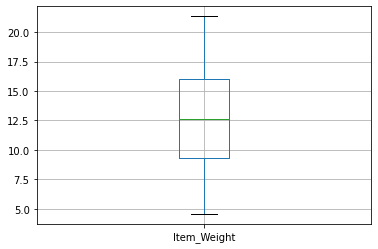

In [25]:
data.boxplot(column=['Item_Weight'])


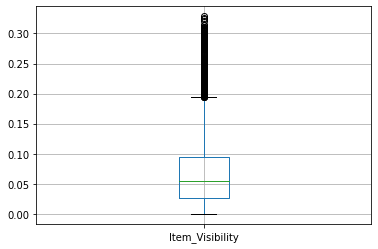

In [26]:
data.boxplot(column=['Item_Visibility'])

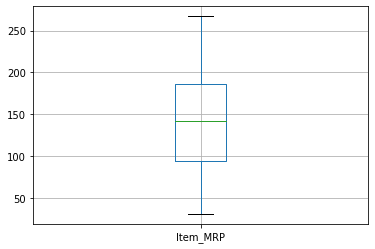

In [27]:
data.boxplot(column=['Item_MRP'])

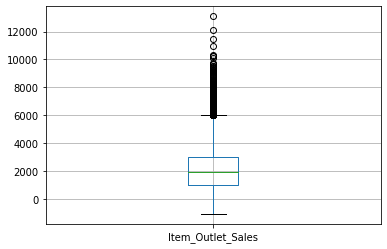

In [28]:
data.boxplot(column=['Item_Outlet_Sales'])

In [29]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_range= Q1-(1.5 * IQR)
  upper_range= Q3+(1.5 *IQR)
  return lower_range, upper_range

In [30]:
lowsales,uppsales=remove_outlier(data['Item_Outlet_Sales'])
data['Item_Outlet_Sales']=np.where(data['Item_Outlet_Sales']>uppsales,uppsales,data['Item_Outlet_Sales'])
data['Item_Outlet_Sales']=np.where(data['Item_Outlet_Sales']<lowsales,lowsales,data['Item_Outlet_Sales'])

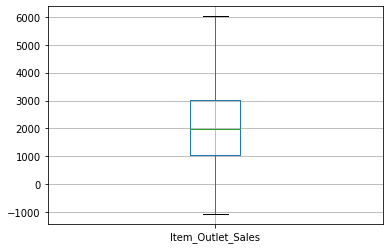

In [31]:
data.boxplot(column=['Item_Outlet_Sales'])

In [32]:
lowsales,uppsales=remove_outlier(data['Item_Visibility'])
data['Item_Visibility']=np.where(data['Item_Visibility']>uppsales,uppsales,data['Item_Visibility'])
data['Item_Visibility']=np.where(data['Item_Visibility']<lowsales,lowsales,data['Item_Visibility'])

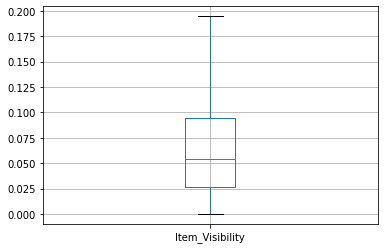

In [33]:
data.boxplot(column=['Item_Visibility'])

In [34]:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,643.617108
Supermarket Type1,2331.347874
Supermarket Type2,1961.386218
Supermarket Type3,3085.139761


In [35]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [36]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data.drop(['Outlet_Establishment_Year'], axis=1)
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [37]:
#Change categories of low fat:
print( 'Original Categories:')
print( data['Item_Fat_Content'].value_counts())

print( '\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print( data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [38]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [39]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type","Item_Type_Combined"]
X = pd.get_dummies(train[feat])
train = pd.concat([train,X],axis=1)

In [46]:
feat = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type","Item_Type_Combined"]
X1 = pd.get_dummies(test[feat])
test = pd.concat([test,X1],axis=1)

In [47]:
train = train.drop(['Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Fat_Content','Outlet_Identifier','Item_Identifier','Item_Type',"Item_Type_Combined"], axis = 1)
test = test.drop(["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content','Outlet_Identifier','Item_Identifier',"Item_Type","Item_Type_Combined"], axis = 1)

In [49]:
X_train = train.drop(labels = ["Item_Outlet_Sales"],axis=1)
y_train = train["Item_Outlet_Sales"]
X_train.shape,y_train.shape

((8523, 69), (8523,))

In [50]:
test.shape

(5681, 69)

In [51]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [52]:
from sklearn import preprocessing

x = X_train.values #returns a numpy array
test_s = test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_train = min_max_scaler.fit_transform(x)
x_scaled_test = min_max_scaler.fit_transform(test_s)
df_train = pd.DataFrame(x_scaled_train)
df_test = pd.DataFrame(x_scaled_test)

In [53]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,0.282525,0.082489,0.927507,0.583333,0.416667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.081274,0.099097,0.072068,1.000000,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.770765,0.086153,0.468288,0.583333,0.416667,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.871986,0.000000,0.640093,0.541667,0.458333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.260494,0.000000,0.095805,0.083333,0.916667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, test_size=0.4)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
preds = gbr.predict(X_test)


In [57]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 692.573118241544
MSE: 937922.1295293141
RMSE: 968.4637987706686


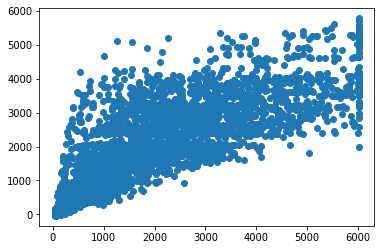

In [58]:
plt.scatter(y_test, preds)
plt.show()

In [59]:
predictions = gbr.predict(df_test)
final = pd.DataFrame({"Item_Identifier":test1["Item_Identifier"],"Outlet_Identifier":test1["Outlet_Identifier"],"Item_Outlet_Sales":abs(predictions)})
final.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1669.893859
1,FDW14,OUT017,1469.478231
2,NCN55,OUT010,645.391467
3,FDQ58,OUT017,2461.996342
4,FDY38,OUT027,5318.088344


In [60]:
final.to_csv('Submiss1.csv',index=False,header=True)
